In [5]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [11]:
path_to_train = "/content/train_happy.h5"
path_to_test = "/content/test_happy.h5"

train_dataset = h5py.File(path_to_train)
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'], ndmin=2)

test_dataset = h5py.File(path_to_test)
x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'], ndmin=2)

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (1, 600)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)


In [12]:
# Normalizing the pixel values between 0 and 1 
# where pixel values original range were between 0 and 255 so we divided by 255
x_train = x_train/255
x_test = x_test/255

In [13]:
y_train = y_train.T #(600,1)
y_test = y_test.T #(150,1)

Image shape : (64, 64, 3)
The person is happy '1' or not happy '0' : [1]


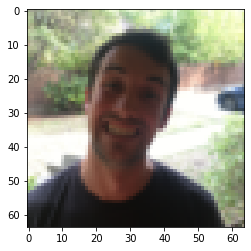

In [14]:
print("Image shape :",x_train[5].shape)
print("The person is happy '1' or not happy '0' :", y_train[5])
imshow(x_train[5])

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers,optimizers
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [16]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(7,7), input_shape=(64,64,3),padding ='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), padding ='same',activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(120,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation = 'relu'))
model.add(Dense(1,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation='sigmoid'))

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [18]:
initial_model = model
initial_model.compile(loss ='binary_crossentropy',metrics =['accuracy'])

In [19]:
model_history= initial_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 4s 309ms/step - loss: 1.5648 - accuracy: 0.5185 - val_loss: 0.7892 - val_accuracy: 0.8667
Epoch 2/8
11/11 [==============================] - 3s 284ms/step - loss: 0.7729 - accuracy: 0.5833 - val_loss: 0.7577 - val_accuracy: 0.8667
Epoch 3/8
11/11 [==============================] - 3s 289ms/step - loss: 0.7178 - accuracy: 0.6685 - val_loss: 0.6980 - val_accuracy: 0.8500
Epoch 4/8
11/11 [==============================] - 3s 318ms/step - loss: 0.6721 - accuracy: 0.6556 - val_loss: 0.7804 - val_accuracy: 0.5167
Epoch 5/8
11/11 [==============================] - 3s 320ms/step - loss: 0.7291 - accuracy: 0.6741 - val_loss: 0.7358 - val_accuracy: 0.4833
Epoch 6/8
11/11 [==============================] - 3s 289ms/step - loss: 0.6489 - accuracy: 0.6981 - val_loss: 0.4971 - val_accuracy: 0.8833
Epoch 7/8
11/11 [==============================] - 4s 355ms/step - loss: 0.5519 - accuracy: 0.7630 - val_loss: 0.6109 - val_accuracy: 0.8667
Epoch 8/8
11/

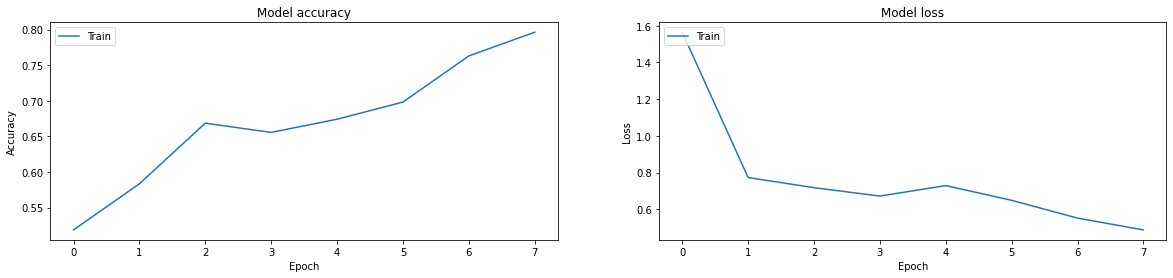

In [20]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [21]:
evaluation = initial_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 50ms/step - loss: 0.4361 - accuracy: 0.8533

Test Accuracy = 0.8533333539962769
Loss = 0.43611568212509155


In [22]:
SGD_model = model
SGD_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='SGD')

In [23]:
model_history = SGD_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 4s 304ms/step - loss: 0.3377 - accuracy: 0.8852 - val_loss: 0.3386 - val_accuracy: 0.9000
Epoch 2/8
11/11 [==============================] - 3s 289ms/step - loss: 0.3254 - accuracy: 0.8963 - val_loss: 0.3242 - val_accuracy: 0.8833
Epoch 3/8
11/11 [==============================] - 3s 289ms/step - loss: 0.3046 - accuracy: 0.9074 - val_loss: 0.3078 - val_accuracy: 0.9000
Epoch 4/8
11/11 [==============================] - 3s 287ms/step - loss: 0.2916 - accuracy: 0.9093 - val_loss: 0.2924 - val_accuracy: 0.9000
Epoch 5/8
11/11 [==============================] - 3s 289ms/step - loss: 0.2901 - accuracy: 0.9037 - val_loss: 0.2797 - val_accuracy: 0.9000
Epoch 6/8
11/11 [==============================] - 3s 287ms/step - loss: 0.2778 - accuracy: 0.9093 - val_loss: 0.3002 - val_accuracy: 0.9000
Epoch 7/8
11/11 [==============================] - 3s 287ms/step - loss: 0.2859 - accuracy: 0.9093 - val_loss: 0.2676 - val_accuracy: 0.9000
Epoch 8/8
11/

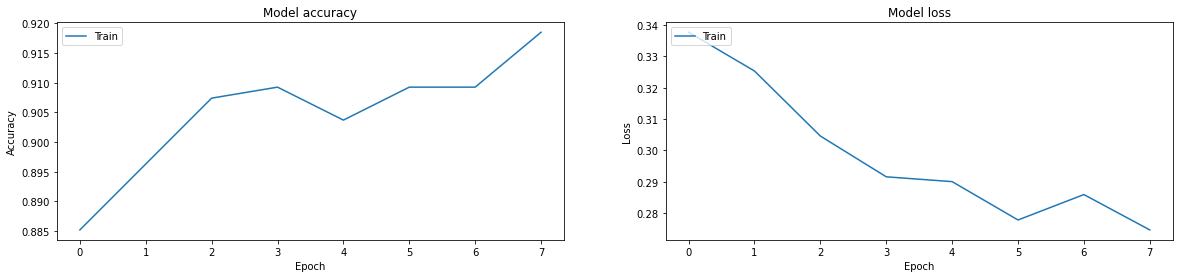

In [24]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [25]:
evaluation = SGD_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 49ms/step - loss: 0.3230 - accuracy: 0.8733

Test Accuracy = 0.8733333349227905
Loss = 0.3230369985103607


In [26]:
RMSProp_model = model
RMSProp_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='RMSProp')

In [27]:
model_history = RMSProp_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 4s 304ms/step - loss: 0.8046 - accuracy: 0.7667 - val_loss: 0.4537 - val_accuracy: 0.8333
Epoch 2/8
11/11 [==============================] - 3s 288ms/step - loss: 0.3953 - accuracy: 0.8278 - val_loss: 0.3330 - val_accuracy: 0.9167
Epoch 3/8
11/11 [==============================] - 3s 301ms/step - loss: 0.4222 - accuracy: 0.8167 - val_loss: 0.3911 - val_accuracy: 0.8333
Epoch 4/8
11/11 [==============================] - 4s 403ms/step - loss: 0.3065 - accuracy: 0.8944 - val_loss: 0.4152 - val_accuracy: 0.8167
Epoch 5/8
11/11 [==============================] - 3s 287ms/step - loss: 0.4324 - accuracy: 0.8222 - val_loss: 0.4147 - val_accuracy: 0.8667
Epoch 6/8
11/11 [==============================] - 3s 289ms/step - loss: 0.2850 - accuracy: 0.9000 - val_loss: 0.2314 - val_accuracy: 0.9500
Epoch 7/8
11/11 [==============================] - 3s 289ms/step - loss: 0.2951 - accuracy: 0.8944 - val_loss: 0.2731 - val_accuracy: 0.9333
Epoch 8/8
11/

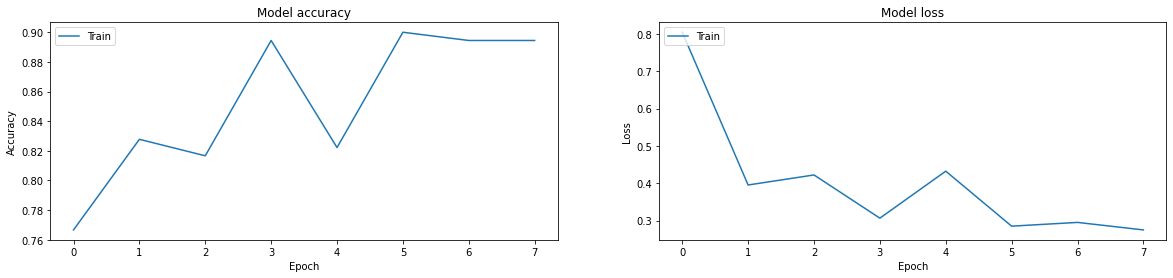

In [28]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()


In [29]:
evaluation = RMSProp_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 49ms/step - loss: 0.2556 - accuracy: 0.9467

Test Accuracy = 0.9466666579246521
Loss = 0.2555859386920929


In [30]:
Adam_model = model
Adam_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='Adam')

In [31]:
model_history = Adam_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 4s 305ms/step - loss: 0.2986 - accuracy: 0.8981 - val_loss: 0.2719 - val_accuracy: 0.9167
Epoch 2/8
11/11 [==============================] - 3s 288ms/step - loss: 0.2192 - accuracy: 0.9315 - val_loss: 0.1676 - val_accuracy: 0.9667
Epoch 3/8
11/11 [==============================] - 3s 288ms/step - loss: 0.1799 - accuracy: 0.9500 - val_loss: 0.1577 - val_accuracy: 0.9667
Epoch 4/8
11/11 [==============================] - 3s 287ms/step - loss: 0.1757 - accuracy: 0.9500 - val_loss: 0.1431 - val_accuracy: 0.9667
Epoch 5/8
11/11 [==============================] - 4s 397ms/step - loss: 0.1711 - accuracy: 0.9574 - val_loss: 0.1444 - val_accuracy: 0.9667
Epoch 6/8
11/11 [==============================] - 4s 371ms/step - loss: 0.1740 - accuracy: 0.9481 - val_loss: 0.1383 - val_accuracy: 0.9833
Epoch 7/8
11/11 [==============================] - 3s 284ms/step - loss: 0.1390 - accuracy: 0.9741 - val_loss: 0.1248 - val_accuracy: 0.9833
Epoch 8/8
11/

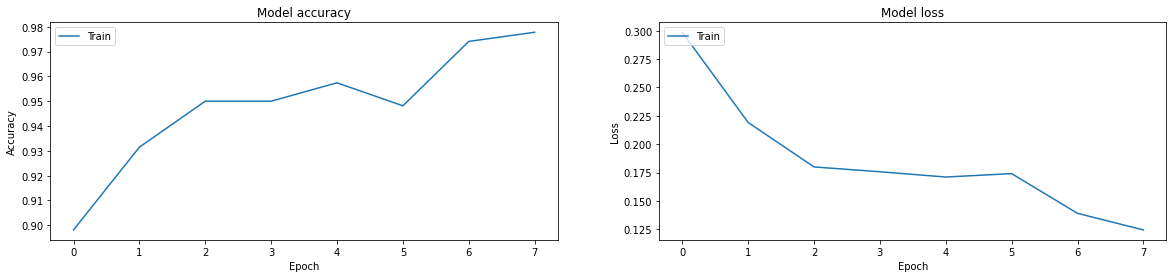

In [32]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [33]:
evaluation = Adam_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 52ms/step - loss: 0.1736 - accuracy: 0.9600

Test Accuracy = 0.9599999785423279
Loss = 0.17361436784267426


In [34]:
Final = model
Final.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='Adam')

In [35]:
model_history = Final.fit(x_train, y_train, epochs=60, batch_size=150, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 4s 794ms/step - loss: 0.2335 - accuracy: 0.9259 - val_loss: 0.1379 - val_accuracy: 0.9667
Epoch 2/60
4/4 [==============================] - 3s 742ms/step - loss: 0.2073 - accuracy: 0.9444 - val_loss: 0.1699 - val_accuracy: 0.9500
Epoch 3/60
4/4 [==============================] - 3s 748ms/step - loss: 0.1800 - accuracy: 0.9444 - val_loss: 0.1533 - val_accuracy: 0.9833
Epoch 4/60
4/4 [==============================] - 3s 745ms/step - loss: 0.1489 - accuracy: 0.9741 - val_loss: 0.1309 - val_accuracy: 0.9667
Epoch 5/60
4/4 [==============================] - 3s 742ms/step - loss: 0.1378 - accuracy: 0.9667 - val_loss: 0.1262 - val_accuracy: 0.9667
Epoch 6/60
4/4 [==============================] - 3s 741ms/step - loss: 0.1304 - accuracy: 0.9741 - val_loss: 0.1298 - val_accuracy: 0.9833
Epoch 7/60
4/4 [==============================] - 4s 875ms/step - loss: 0.1180 - accuracy: 0.9778 - val_loss: 0.1310 - val_accuracy: 0.9500
Epoch 8/60
4/4 [====

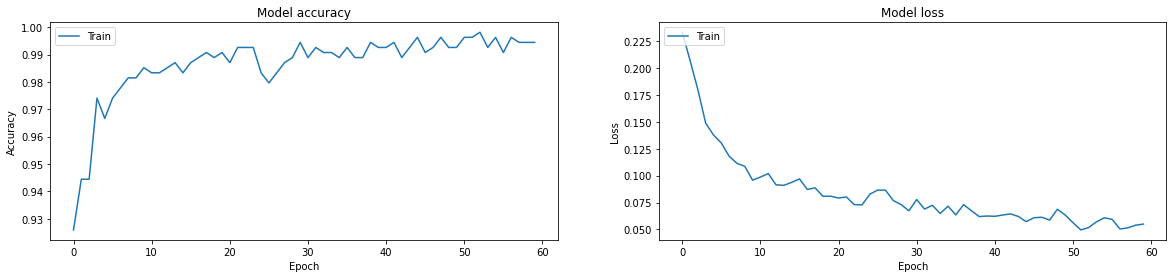

In [36]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()


In [37]:
evaluation = Final.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 50ms/step - loss: 0.0939 - accuracy: 0.9800

Test Accuracy = 0.9800000190734863
Loss = 0.09386417269706726
